German Credit Risk8

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import silhouette_score
import os

In [2]:
df = pd.read_csv("E:/Medium/German Credit Risk/german_credit_data.csv")
df.shape

(1000, 10)

In [3]:
df.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car

In [4]:
df.tail()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  
995           1736        12  furniture/equipment  
996           3857        30                  car  
997            804        12             radio/TV  
998           1845        45             radio/TV  
999           4576        45                  car

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


Dari info datas, terdapat beberapa variable numerik dan kategorikal yang terlihat dari tipedatanya. Namun ada feature yang memiliki tipe data numerik padahal merupakan feature kategorikal, contohnya Job

In [6]:
df.describe()

Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000

Dari yang ditampilkan, rata rata pengguna credit memiliki umur 35 tahun, credit amount 3271 dan durasinya 20 bulan.

Pada tahap ini, dilakukan identifikasi terhadap data yang memiliki NULL value, atau bisa dikatakan kosong pada baris tertentu

In [7]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Setelah dilakukan pengecekan, null values berada pada saving account dan checking account yang merupakan data kategorik, sehingga tidak dilakukan pengisian value dikarenakan proses klasterisasi menggunakan data numerik.

kita akan melakukan pengamatan dari visualisasi data yang diharapkan memberi pandangan baru terhadap data yang akan kita teliti.

In [8]:
df['Cicil'] = df['Credit amount'] / df['Duration']

Kolom Cicil merupakan pembagian dari Credit amount dan Duration, yang merupakan pembayaran rutin yang harus dibayarkan tiap bulan selama periode durasi tertentu.

<AxesSubplot:>

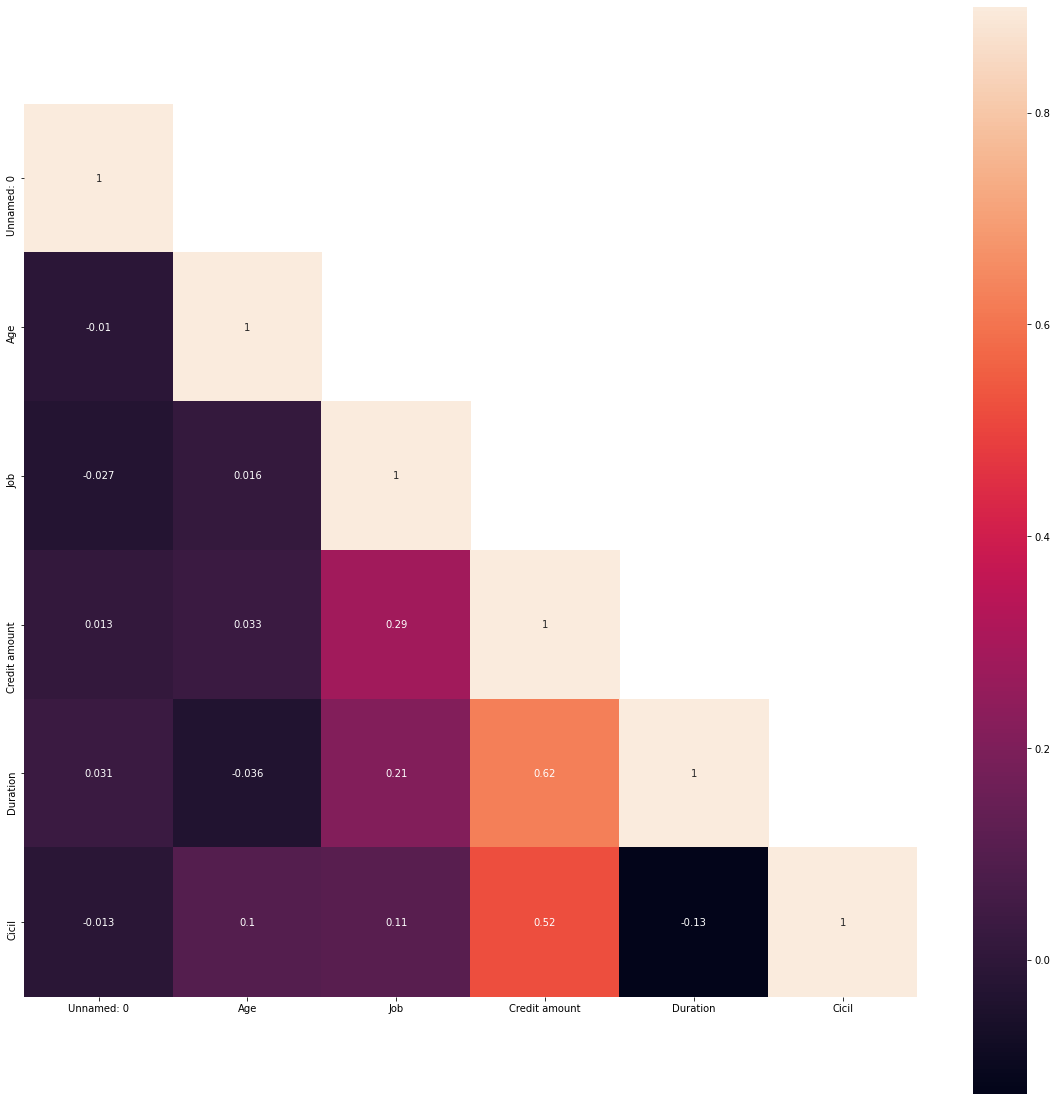

In [9]:
#create correlation with heatmap
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

Dari tabel diatas, dapat disimpulkan bahwa korelasi yang relatif besar terjadi pada feature Cicil & Credit amount sebesar 0.52, Duration & Credit amount sebesar 0.62 dan lain hal.

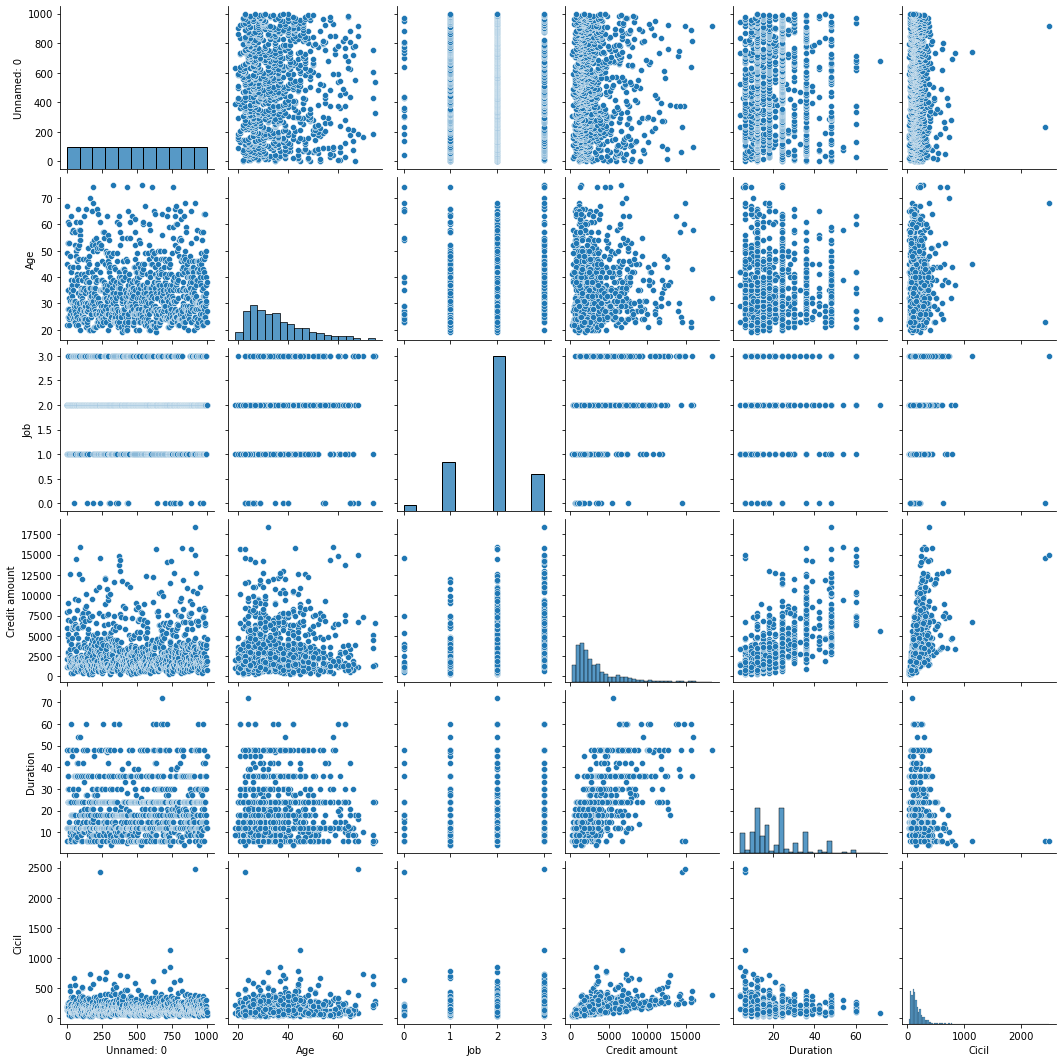

In [10]:
sns.pairplot(df)

Dari diatas kita dapat mengetahui persebaran data numerik yang terbentuk.

Text(0.5, 1.0, 'Jumlah dan tujuan mengambil kredit')

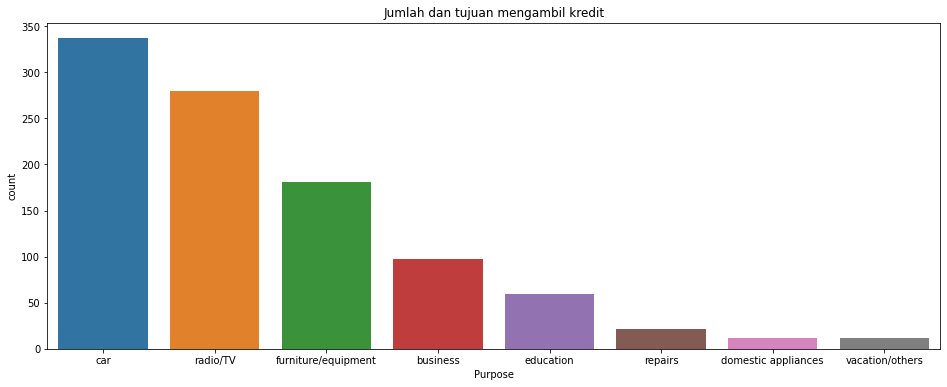

In [11]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Purpose', data=df, order = df['Purpose'].value_counts().index).set_title('Jumlah dan tujuan mengambil kredit')

Setelah mengetahui jumlah orang untuk setiap tujuan, sewajarnya kita penasaran dengan umur orang yang mengambil tujuan tersebut. Lalu dibawah disajikan rata-rata umur orang pada setiap tujuan yang dipilih

In [12]:
purpose = df.groupby(by='Purpose').mean()['Age']
purpose_df = pd.DataFrame({'Purpose' : purpose.index, 'Age' : purpose.values.astype(int)})
fig = px.line(purpose_df, x="Purpose", y="Age", title='Rata-rata umur pada setiap tujuan kredit')
fig.show()

Dari grafik diatas terlihat umur terendah ada pada furniture/equipment, namun vacation/other memiliki umur yang paling tinggi.

In [13]:
df.groupby(by='Housing').mean()

Unnamed: 0        Age       Job  Credit amount   Duration       Cicil
Housing                                                                       
free     489.444444  43.814815  2.157407    4906.212963  27.453704  192.566092
own      497.074334  35.593268  1.879383    3060.939691  20.328191  162.291174
rent     515.229050  30.368715  1.849162    3122.553073  19.240223  174.169135

Kepemilikan rumah rerata berada pada umur 35 tahun, sedangkan penyewa terbanyak berada pada umur 30an tahun. namun rerata umur 43 tahun tidak memiliki rumah.

C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution Plot of Credit amount')

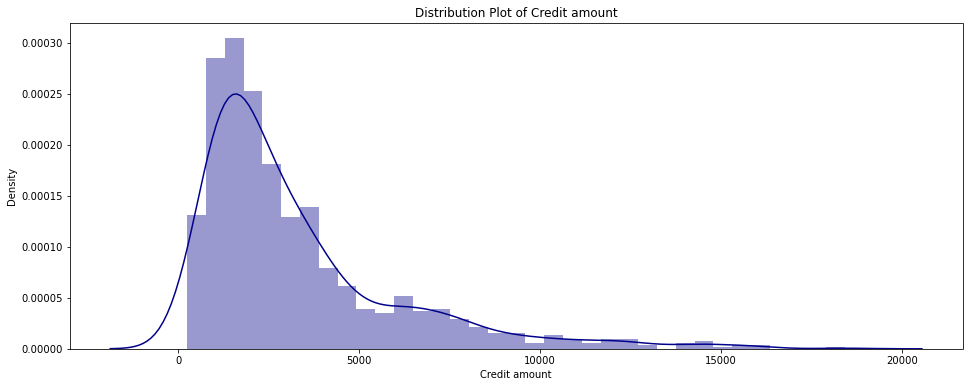

In [14]:
plt.figure(figsize=(16, 6))
sns.distplot(df['Credit amount'], kde = True, color = 'darkblue', label = 'Credit amount').set_title('Distribution Plot of Credit amount')

In [15]:
df_job = df.where(df['Job']==0).dropna()
df_job.where(df_job['Credit amount'] >= df['Credit amount'].mean()).dropna()

Unnamed: 0   Age     Sex  Job Housing Saving accounts Checking account  \
347       347.0  23.0  female  0.0    rent      quite rich         moderate   
438       438.0  65.0    male  0.0     own          little           little   
950       950.0  40.0    male  0.0     own          little         moderate   

     Credit amount  Duration   Purpose       Cicil  
347         3758.0      24.0  radio/TV  156.583333  
438         3394.0      42.0   repairs   80.809524  
950         3590.0      18.0  business  199.444444

Dari hasil query pada dataset diatas, dapat disimpulkan bahwa tiap umur memiliki kecenderungan yang unik. data diatas adalah orang dengan job UnSkilled namun memiliki credit amount lebih dari rata-rata 

Importing models and training the data

Klasterisasi menggunakan K-Means, dikarenakan pengaplikasiannya yang cukup mudah dan memiliki keakurasian yang cukup bagus

In [16]:
from sklearn.cluster import KMeans
import numpy as np

Feature: Job - Credit amount - Duration

In [17]:
X = np.asarray(df[["Job", "Credit amount", "Duration"]])
X[:,0] = X[:,0] + 1
# X[:,1] = np.log(X[:,1])
# X[:,2] = np.log(X[:,2])
X = np.log(X)

Mencari Nilai K Menggunakan Elbow Method

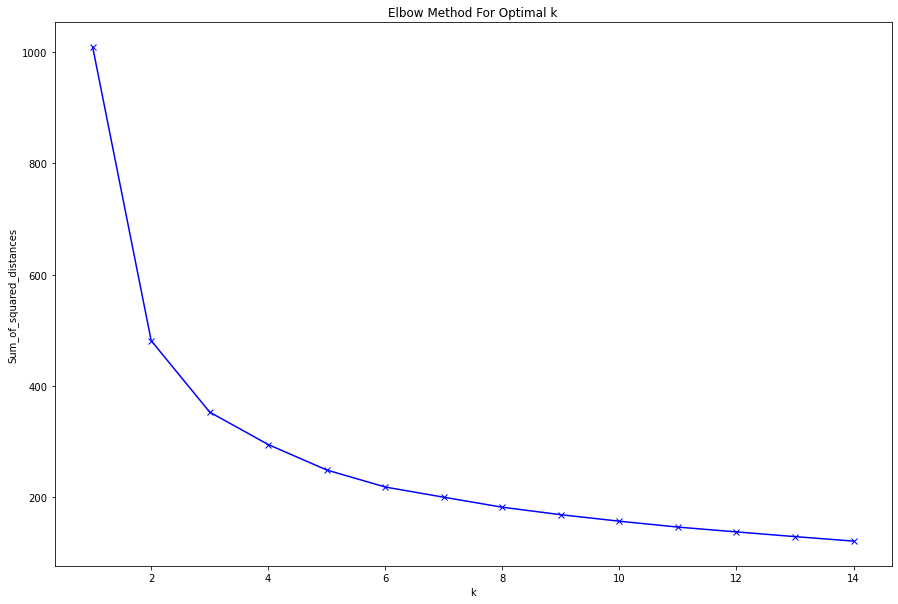

In [18]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(15,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Klasterisasi dengan K yang Telah Didapat

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 0, 2, 1, 1, 2, 0, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 2, 1, 2,
       1, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 0,
       0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 2,
       2, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2,
       1, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0,
       0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0,
       2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1,
       0, 0, 2, 1, 2, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0,

Pada tahap evaluasi ini, menggunakan Silhouette score yang akan dibandingkan dengan feature lain

In [20]:
ss_1 = silhouette_score(X, kmeans.labels_, metric='euclidean')

Visualisasi

Grafik klasterisasi Jobs - Credit Amount - Duration


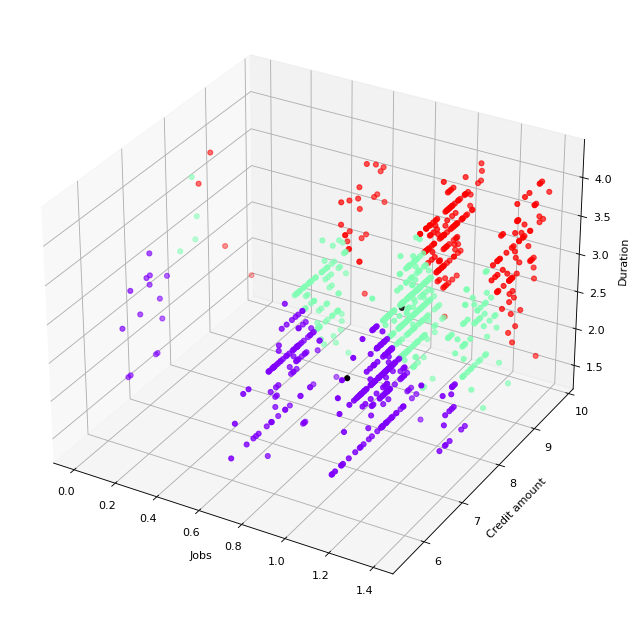

In [21]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(X[:,0], X[:,1], X[:,2], c=kmeans.labels_, cmap='rainbow')
ax.scatter3D(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='black')

xLabel = ax.set_xlabel('Jobs', linespacing=3.2)
yLabel = ax.set_ylabel('Credit amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("Grafik klasterisasi Jobs - Credit Amount - Duration")

In [22]:
df['Risk Jobs'] = kmeans.labels_

Langkah selanjutnya sama seperti diatas, namun akan dikombinasikan dengan Feature yang telah dipilih diatas

In [23]:
X = np.asarray(df[["Age", "Credit amount", "Duration"]])
X = np.log(X)

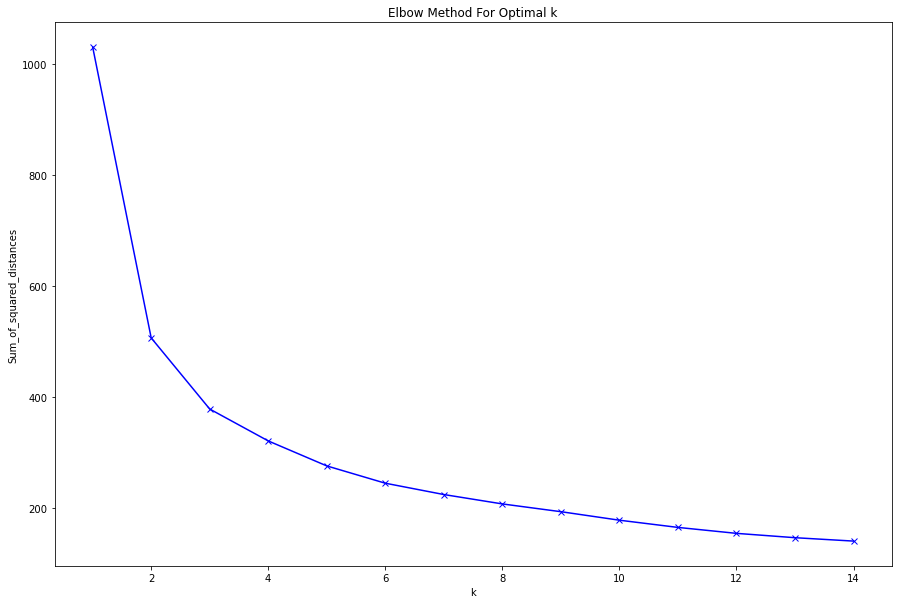

In [24]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(15,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1,
       1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1,
       0, 2, 0, 0, 1, 2, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1,
       0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1,
       0, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 2, 1, 1,
       1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2,
       1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2,

In [26]:
ss_2 = silhouette_score(X, kmeans.labels_, metric='euclidean')

Grafik Klasterisasi Age - Credit Amount - Duration


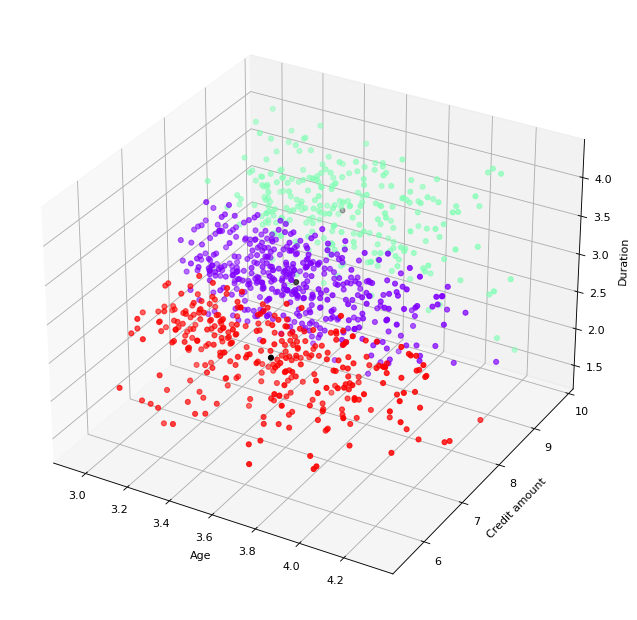

In [27]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(X[:,0], X[:,1], X[:,2], c=kmeans.labels_, cmap='rainbow')
ax.scatter3D(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='black')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("Grafik Klasterisasi Age - Credit Amount - Duration")

In [28]:
df['Risk Ages'] = kmeans.labels_

In [29]:
X = np.asarray(df[["Credit amount", "Duration"]])
X = np.log(X)

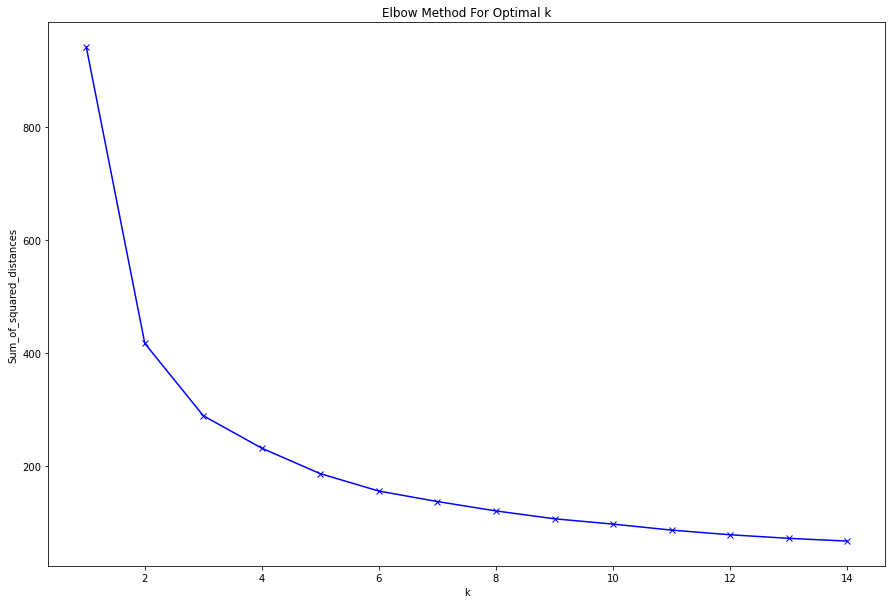

In [30]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(15,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [31]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0,
       0, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0,
       1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 0,
       1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0,
       0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0,
       1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2,
       1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2,
       2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2,
       0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1,
       2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,

In [32]:
ss_3 = silhouette_score(X, kmeans.labels_, metric='euclidean')

Grafik klasterisasi Duration - Credit Amount


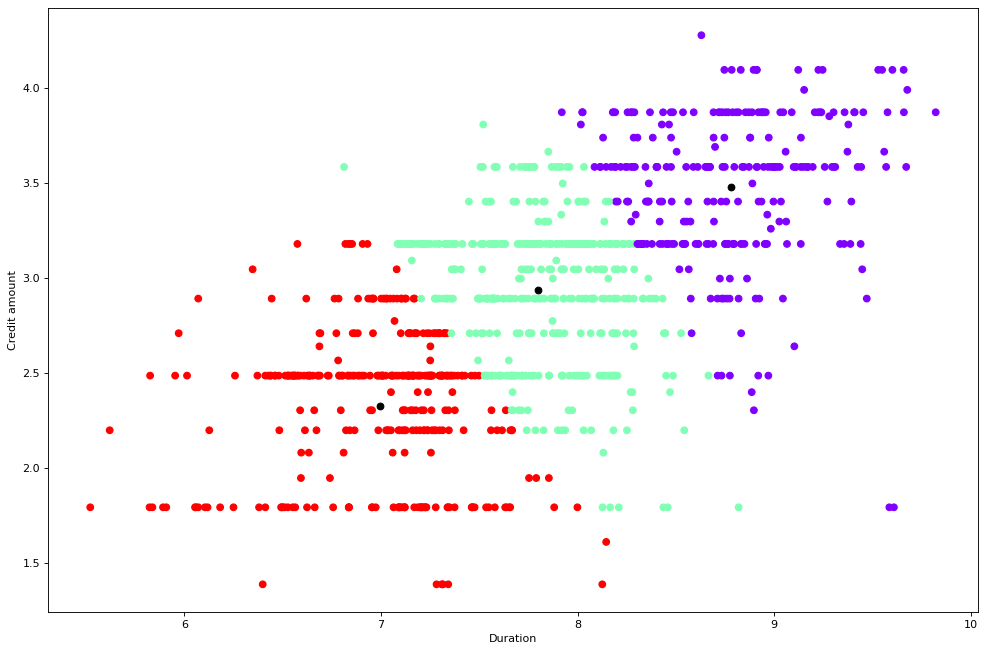

In [33]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

plt.xlabel('Duration')
plt.ylabel('Credit amount')

print("Grafik klasterisasi Duration - Credit Amount")

In [34]:
df['Risks'] = kmeans.labels_

In [35]:
X = np.asarray(df[["Cicil", "Age"]])
X = np.log(X)

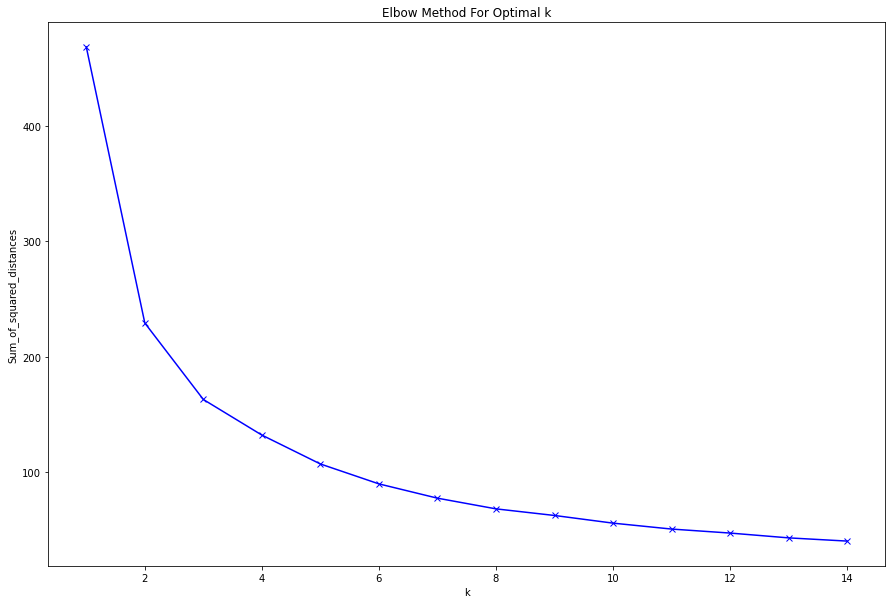

In [36]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(15,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1,
       0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1,
       0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1,
       0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1,
       1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1,
       1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1,
       0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [38]:
ss_4 = silhouette_score(X, kmeans.labels_, metric='euclidean')

Grafik klasterisasi Cicil - Age


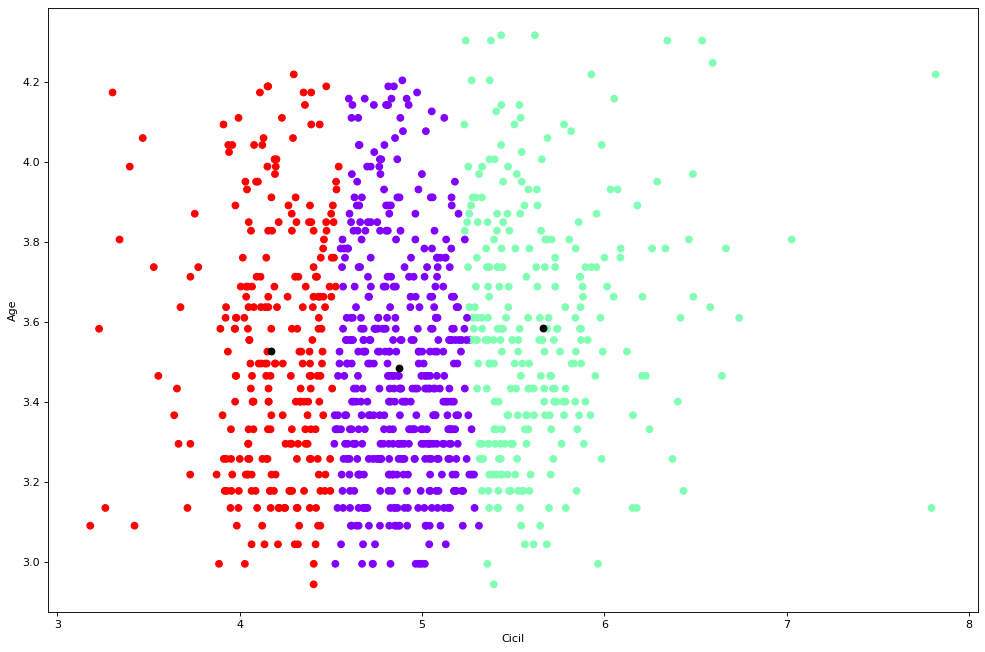

In [39]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

plt.xlabel('Cicil')
plt.ylabel('Age')

print("Grafik klasterisasi Cicil - Age")

In [40]:
df['Risk Cicil'] = kmeans.labels_

In [41]:
df.sort_values(by='Cicil', ascending=False).head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
917         917   68    male    3     own          little           little   
236         236   23    male    0     own             NaN         moderate   
738         738   45    male    3     own          little              NaN   
734         734   37  female    2     own          little              NaN   
693         693   44    male    1     own             NaN           little   

     Credit amount  Duration Purpose        Cicil  Risk Jobs  Risk Ages  \
917          14896         6     car  2482.666667          2          1   
236          14555         6     car  2425.833333          2          1   
738           6761         6     car  1126.833333          1          0   
734           3380         4     car   845.000000          0          2   
693           4716         6     car   786.000000          1          0   

     Risks  Risk Cicil  
917      0           1  
236      0           1  
738      1           1  
734      2           1  
693      1           1

In [42]:
df_result = df.drop(columns=['Cicil', 'Risk Jobs', 'Risk Ages', 'Risks', 'Risk Cicil'])
df_result.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car

Summary of Silhouette Score

In [43]:
print('silhouette Job - Credit amount - Duration: ', ss_1) 
print('silhouette Age - Credit amount - Duration: ', ss_2) 
print('silhouette Credit amount - Duration: ', ss_3) 
print('silhouette Cicil - Age: ', ss_4) 

silhouette Job - Credit amount - Duration:  0.33899821305349076
silhouette Age - Credit amount - Duration:  0.31428516325465067
silhouette Credit amount - Duration:  0.37667066374237207
silhouette Cicil - Age:  0.3615316116144995


Dari hasil yang didapat, silhouette yang paling bagus menggunakan feature Credit Amount & Duration. Langkah selanjutnya adalah pengecekan K dengan silhouette score

In [44]:
X = np.asarray(df[["Credit amount", "Duration"]])
X = np.log(X)

In [45]:
silhouette = []
K = range(3,6)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    ss = silhouette_score(X, km.labels_, metric='euclidean')
    silhouette.append(ss)
    
pd.DataFrame({'K' : K, 'Silhouette' : silhouette})

K  Silhouette
0  3    0.377328
1  4    0.383150
2  5    0.353414

In [46]:
km = KMeans(n_clusters=4)
km.fit(X)

KMeans(n_clusters=4)

In [47]:
df_result['Risk'] = km.labels_

Pada kolom risk, terdapat value:
0 : Bad
1 : Medium
2 : Good
3 : Very God

In [48]:
df_result

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  Risk  
0             1169         6             radio/TV     0  
1             5951        48             radio/TV     3  
2             2096        12            education     2  
3             7882        42  furniture/equipment     3  
4             4870        24                  car     3  
..             ...       ...                  ...   ...  
995           1736        12  furniture/equipment     0  
996           3857        30                  car     1  
997            804        12             radio/TV     0  
998           1845        45             radio/TV     1  
999           4576        45                  car     3  

[1000 rows x 11 columns]